<a href="https://colab.research.google.com/github/sandro003/MVP3/blob/main/Machine_Learning_%26_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRODUÇÃO:
Todo ser humano tem o direito à água potável que, além de fundamental para a sua saúde, é um direito humano básico e fundamental para políticas públicas eficazes. Estudos mostram que Investimentos em abastecimento de água e saneamento geram benefícios econômicos, pois as economias resultantes da redução dos impactos à saúde e dos custos médicos superam amplamente os gastos necessários para sua implementação.

Com base acima entendi que seria viável treinar alguns modelos de machine learning para um problema de classificação passando por algumas etapas para poder avaliar e comparar os resultados com os modelos treinados.

Os  modelos serão treinados usando um dataset de "Água Potável" e explorará algoritmos como Random Forest, Logistic Regression e KNN para identificar as características que indicam se a água é segura para consumo humano.


## Preparando o ambiente para a criação do MVP Machine Learning & Analytics e realizando a Análise dos Dados

Nesta etapa a ideia é entender a informação que está disponível levando-se em conta algumas estatísticas descritivas para uma possível necessidade de transformação na etapa de preparação de dados. Abaixo foram dispostos alguns comandos bem como suas finalidades.

ATRIBUTOS DO DATASET:
1. pH value: Parâmetro importante para avaliar o equilíbrio ácido-base da água.
2. Hardness: Medida da capacidade da água de formar precipitados com sabão.
3. Solids (Total dissolved solids - TDS): A água tem a capacidade de dissolver uma variedade de minerais inorgânicos e alguns orgânicos, como potássio, cálcio, sódio, bicarbonatos, cloretos, magnésio e sulfatos.
4. Chloramines: São desinfetantes usados nos sistemas públicos de água.
5. Sulfate: Mede a concentração de sulfato na água.
6. Conductivity: Mede o processo iônico da solução que permite a transmissão de corrente elétrica.
7. Organic_carbon: Mede a quantidade total de carbono em compostos orgânicos na água.
8. Trihalomethanes: Produtos químicos que podem ser encontrados na água tratada com cloro.
9. Turbidity: É uma medida das propriedades de emissão de luz da água.
10. Potability: Indica se a água é segura para consumo humano.

In [ ]:
from google.colab import drive

# Força a remontagem do Google Drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
# Bibliotecas responsáveis por fazerem a leitura e impressão da base de dados
import pandas as pd #(Importando PANDAS e criando alias para facilitar na digitação)
import numpy as np #Biblioteca para operações matemáticas e manipulação de grandes arranjos e matrizes multidimensionais.
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt to define 'plt'
from sklearn.model_selection import train_test_split # Função para dividir os dados em conjuntos de treinamento e teste.
from sklearn.preprocessing import StandardScaler # Biblioteca responsável pela padronização dos dados.
from sklearn.ensemble import RandomForestClassifier # Implementação do algoritmo Random Forest.
from sklearn.neighbors import KNeighborsClassifier # Implementação do algoritmo k-Nearest Neighbors (KNN).
from sklearn.linear_model import LogisticRegression # Implementação da regressão logística.
from sklearn.model_selection import GridSearchCV # Ferramenta para realizar a busca em grade (grid search), que ajuda a otimizar os hiperparâmetros do modelo.
from sklearn.model_selection import cross_val_score, StratifiedKFold # Ferramentas para realizar validação cruzada do modelo.
import seaborn as sns  # Importa o Seaborn e define o alias 'sns'
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc # oferece uma série de funções úteis para avaliar e medir o desempenho de modelos de aprendizado de máquina.

1- Realizando a importação do arquivo csv e verificando as características gerais do Dataframe.

In [ ]:
# Lendo o arquivo csv
df = pd.read_csv('https://raw.githubusercontent.com/sandro003/MVP3/refs/heads/main/water_potability.csv')

In [ ]:
# Exibindo as primeiras linhas do DataFrame (Mostra as 5 primeiras linhas por padrão e as 5 últimas)
print(df.head())

In [ ]:
# Visualizando as informações gerais do DataFrame (Informações sobre colunas, tipos de dados e valores nulos)
print(df.info())

In [ ]:
# Fazendo um resumo estatístico das colunas numéricas (Estatísticas descritivas como média e desvio padrão)
print(df.describe())

In [ ]:
# Verificar a dimensão do DataFrame, ou seja, a quantidade de atributos e instâncias existentes (Número de linhas e colunas)
print(f"Dimensões do dataset: {df.shape}")

## Pré-processamento dos Dados
Nesta etapa a ideia é identificar e tratar valores ausentes, separar recursos e rótulos, normalizar os dados, dividir os dados em treino e teste. Como Premissas e Hipóteses verifiquei que as variáveis de entrada estão relacionadas com o problema de forma que o modelo preditivo foi aplicado com sucesso e existiam padrões de comportamento que foram encontrados pelos algoritmos de machine learning. A preparação dos dados foi feita nesta etapa do MVP onde foi feita a limpeza, a transformação, a divisão, além da visualização e análise exploratória dos dados. Para poder selecionar os dados foram impostas Restrições de Qualidade pois utilizei somente dados completos (sem valores faltantes).



In [ ]:
# Visualizar se há valores ausentes (Contagem de valores nulos por coluna)
print(df.isnull().sum())

In [ ]:
# Tratar valores ausentes (Removendo linhas com valores nulos "NaN")
df = df.dropna()

In [ ]:
# Visualizar o dataset após o tratamento dos valores ausentes (Contagem de valores nulos por coluna)
print(df.isnull().sum())

In [ ]:
# Separar X (features) e y (target) onde 'Potability' é o rótulo
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
# Normalizar os dados (padronização)
scaler = StandardScaler()

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Plotar histogramas para as features
X.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribuição das Variáveis (Features)', fontsize=16)
plt.show()

In [ ]:
# Heatmap de correlação entre as variáveis
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Mapa de Correlação entre Variáveis', fontsize=16)
plt.show()

In [ ]:
# Boxplots para cada variável em relação à classe Potability
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=y, y=X[column])
    plt.title(f'{column} vs Potability', fontsize=10)
    plt.xlabel('Potability')
    plt.ylabel(column)
    plt.tight_layout()
plt.suptitle('Distribuição de Variáveis por Classe', fontsize=16, y=1.02)
plt.show()

## Treinamento e Avaliação dos Modelos de Classificação
Nesta etapa a ideia foi abordar as questões relacionadas à modelagem e escolha de algoritmos para prever se a água é potável ou não. Resolvi testar com 3 algoritmos diferentes e apurar qual teria o melhor desempenho e aplicar o modelo. Foram treinados os modelos Random Forest, Logistic Regression e KNN nos dados de treino e avaliadas as performances usando acurácia, matriz de confusão e curvas ROC.

In [ ]:
# Dividir em X (features) e y (target)
X = df.drop('Potability', axis=1)  # Features
y = df['Potability']  # Target

In [ ]:
# Normalizar os dados (apenas X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treinar o modelo usando Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Fazer predições (Probabilidades para classe positiva)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Avaliação
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Importância das Features
feature_importances = rf.feature_importances_
features = X.columns # Use the original DataFrame 'X' to get the column names
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Importância das Features - Random Forest", fontsize=16)
plt.xlabel("Importância")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Curva ROC - Random Forest", fontsize=16)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Treinar o modelo usando Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Fazer predições (Probabilidades para classe positiva)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Avaliação
print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()

# Coeficiente das Features para regressão logística
coefficients = log_reg.coef_[0]
features = X.columns  # Usando o DataFrame original 'X' para obter os nomes das colunas
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette="viridis")
plt.title("Coeficientes das Features - Logistic Regression", fontsize=16)
plt.xlabel("Coeficiente")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Curva ROC - Logistic Regression", fontsize=16)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Treinar o modelo K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazer predições
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Avaliação
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusão - K-Nearest Neighbors")
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Curva ROC - K-Nearest Neighbors", fontsize=16)
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.show()

# Acurácia por número de vizinhos (k)
k_values = range(1, 21)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)  # Usando o método .score para calcular a acurácia
    mean_scores.append(score)

# Plotar a acurácia por número de vizinhos
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-', color='b')
plt.title("Acurácia por Número de Vizinhos (k)", fontsize=16)
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid()
plt.show()


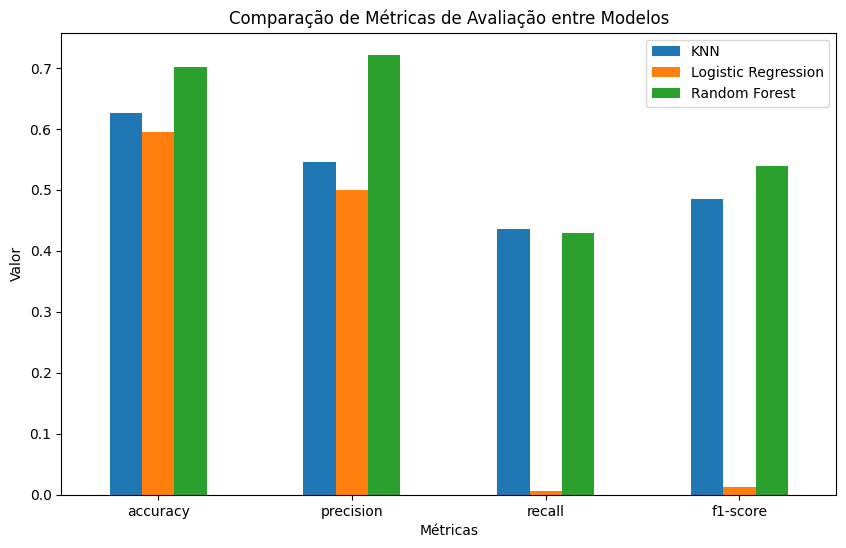

In [58]:
# Métricas de avaliação para cada modelo
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
# Use y_pred_log_reg instead of y_pred_lr
lr_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Preparando os dados para o gráfico
metrics_data = {
    'KNN': [knn_report['accuracy'], knn_report['1']['precision'], knn_report['1']['recall'], knn_report['1']['f1-score']],
    'Logistic Regression': [lr_report['accuracy'], lr_report['1']['precision'], lr_report['1']['recall'], lr_report['1']['f1-score']],
    'Random Forest': [rf_report['accuracy'], rf_report['1']['precision'], rf_report['1']['recall'], rf_report['1']['f1-score']],
}

# Gráfico de barras comparando as métricas de avaliação
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df = pd.DataFrame(metrics_data, index=metrics)
metrics_df.plot(kind='bar', ax=ax)
ax.set_title('Comparação de Métricas de Avaliação entre Modelos')
ax.set_ylabel('Valor')
ax.set_xlabel('Métricas')
plt.xticks(rotation=0)
plt.show()

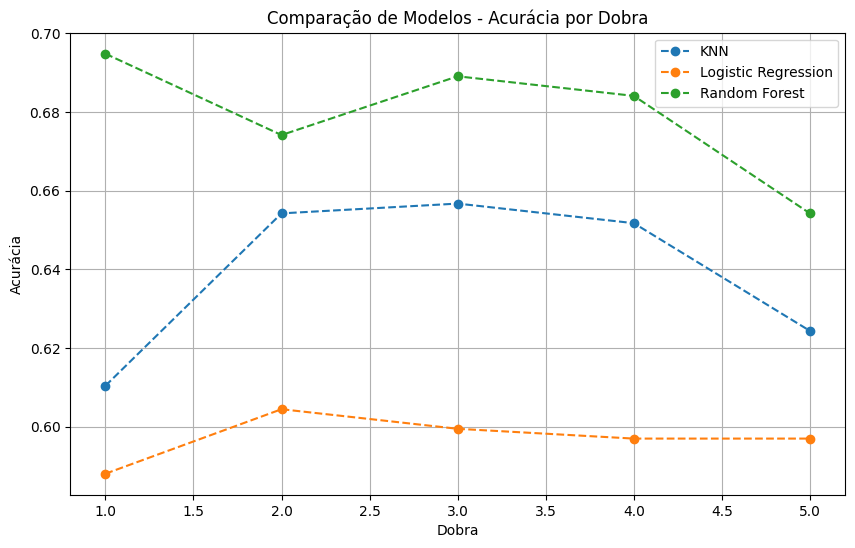

In [59]:
# Visualizar os resultados
# Configurar validação cruzada (se ainda não estiver configurada)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criar o melhor modelo KNN (substitua 5 pelo melhor k)
knn_best = KNeighborsClassifier(n_neighbors=5)

# Calcular as pontuações de validação cruzada
scores_knn = cross_val_score(knn_best, X_scaled, y, cv=cv, scoring='accuracy')

# Criar e treinar o modelo de Regressão Logística
lr = LogisticRegression(random_state=42, max_iter=1000)
scores_lr = cross_val_score(lr, X_scaled, y, cv=cv, scoring='accuracy')

# Criar e treinar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)
scores_rf = cross_val_score(rf, X_scaled, y, cv=cv, scoring='accuracy')

# Criar um dicionário para armazenar os resultados
results = {
    'KNN': scores_knn,
    'Logistic Regression': scores_lr,
    'Random Forest': scores_rf
}

# Verifique se todos os modelos têm o mesmo número de dobras
assert len(scores_knn) == len(scores_lr) == len(scores_rf), "O número de dobras nos modelos não é igual!"

# Visualizar os resultados
plt.figure(figsize=(10, 6))
for model_name, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--', label=model_name)

plt.title('Comparação de Modelos - Acurácia por Dobra')
plt.xlabel('Dobra')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

##Comparar o Desempenho e Ajustar Hiperparâmetros
Nesta etapa a ideia foi comparar o desempenho dos modelos acima e otimizar os hiperparâmetros para obter a melhor performance do modelo. Utilizei como métrica a acurácia e optei por usar o KNN como algoritmo principal. Testei algumas combinações de valores de hiperparâmetros em uma grade para encontrar a melhor combinação (Grid Search).


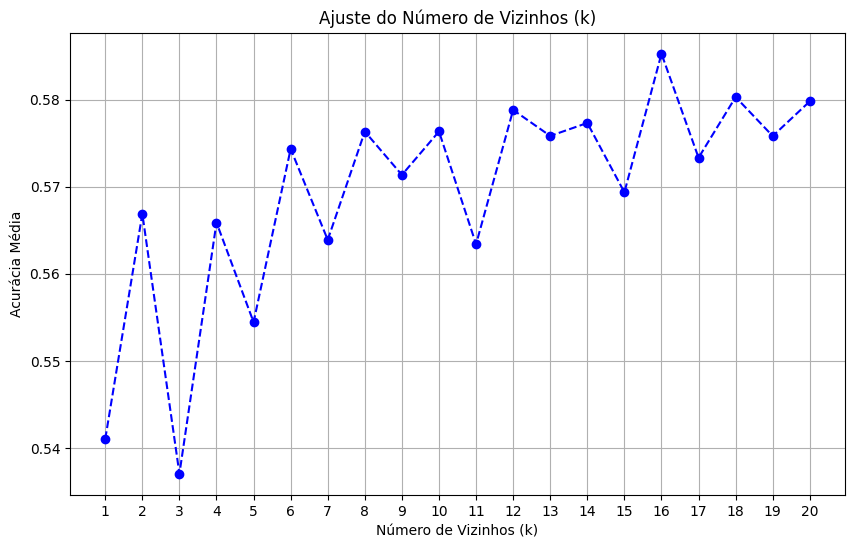

In [60]:
# Testar diferentes valores de k
k_values = range(1, 21)  # Valores de k de 1 a 20
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    mean_scores.append(scores.mean())

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='--', color='b')
plt.title('Ajuste do Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia Média')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Configurando validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definindo a lista de valores de k para testar
k_values = [3, 5, 7, 9, 11, 13]

# Criando o modelo KNN
knn = KNeighborsClassifier()

# Definindo o dicionário de parâmetros para o GridSearch
param_grid = {'n_neighbors': k_values}

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy')

# Treinando o GridSearchCV com os dados
grid_search.fit(X, y)

# Exibindo os melhores parâmetros encontrados e a melhor acurácia
print(f"Melhor valor de k: {grid_search.best_params_['n_neighbors']}")
print(f"Melhor acurácia: {grid_search.best_score_:.4f}")

# Treinando o modelo KNN com o melhor valor de k encontrado
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Avaliando o modelo final com Cross-Validation
final_scores = cross_val_score(best_knn, X, y, cv=cv, scoring='accuracy')

# Exibindo as acurácias por dobra e a acurácia média
print(f"Acurácias por dobra: {final_scores}")
print(f"Acurácia média final: {final_scores.mean():.4f}")


Melhor valor de k: 13
Melhor acurácia: 0.5758
Acurácias por dobra: [0.58808933 0.57711443 0.55472637 0.58208955 0.57711443]
Acurácia média final: 0.5758


Melhor KNN - Acurácias por dobra: [0.58808933 0.57711443 0.55472637 0.58208955 0.57711443]
Melhor KNN - Acurácia média: 0.5758


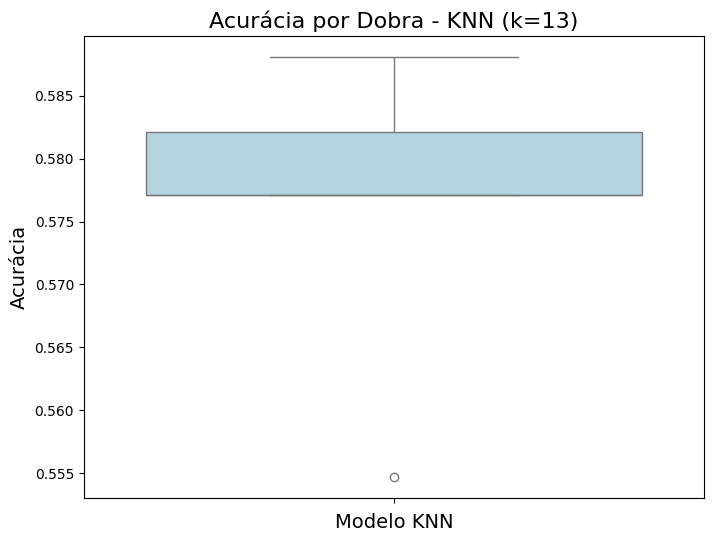

In [63]:
# Verificar se o grid_search foi treinado corretamente
# Changed grid_knn to grid_search
if 'grid_search' not in locals() or grid_search.best_params_ is None:
    raise ValueError("O GridSearchCV não foi executado ou o modelo não foi treinado corretamente.")

# Obter o melhor valor de 'n_neighbors' após o GridSearchCV
best_k = grid_search.best_params_['n_neighbors']

# Criar o modelo KNN com o melhor valor de k
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Avaliar o modelo com validação cruzada (Cross-Validation)
final_scores = cross_val_score(knn_best, X, y, cv=cv, scoring='accuracy')

# Exibir as acurácias por dobra e a acurácia média
print(f"Melhor KNN - Acurácias por dobra: {final_scores}")
print(f"Melhor KNN - Acurácia média: {final_scores.mean():.4f}")

# Plotando a distribuição das acurácias por dobra usando um boxplot
plt.figure(figsize=(8, 6))  # Melhorando o tamanho da figura para maior visibilidade
sns.boxplot(data=final_scores, color='lightblue')

# Melhorando o gráfico com título, rótulo e customizando o visual
plt.title(f'Acurácia por Dobra - KNN (k={best_k})', fontsize=16)
plt.ylabel('Acurácia', fontsize=14)
plt.xlabel('Modelo KNN', fontsize=14)

# Exibindo o gráfico
plt.show()

##CONCLUSÃO
A utilização de modelos de machine learning para classificar a potabilidade da água é uma abordagem promissora para melhorar a gestão e o acesso à água potável. Através da aplicação de algoritmos como Random Forest, Logistic Regression e KNN, foi possível identificar de forma eficiente as variáveis que influenciam a qualidade da água, contribuindo para a implementação de políticas públicas mais assertivas e eficazes. Assim, o uso de tecnologias como machine learning pode ser uma ferramenta poderosa para promover um futuro mais sustentável e seguro para as populações, alinhando desenvolvimento econômico e proteção à saúde. Além disso, a análise comparativa entre os modelos permitirá selecionar o mais adequado para prever a potabilidade da água, trazendo benefícios significativos para a saúde pública e para a redução de custos com tratamentos médicos relacionados à ingestão de água contaminada.

##BIBLIOGRAFIA:
Water Quality. Kaggle, 2023. Disponível em: https://www.kaggle.com/datasets/adityakadiwal/water-potability. Acesso em: 05/11/2024.

Engenharia de Dados: o que é, o que faz e um Guia completo. Alura, 2023. Disponível em: https://www.alura.com.br/artigos/engenharia-dados?srsltid=AfmBOorWZVr2iVRqWcdb_6UGxSMEo0bEje0oltL2ydb8COmuYBDUr43E. Acesso em: 07/11/2024.

Introdução à Ciência de Dados - Introdução à Machine Learning: UNIVESP, 2021. Disponível em: https://www.youtube.com/watch?v=tKx8E8pW0P0. Acesso em: 16/11/2024.

Introdução a Machine Learning | Curso do Kaggle: Mario Filho. Youtube, 2022. Disponível em: https://www.youtube.com/watch?v=s2drgo58G2c. Acesso em: 23/11/2024.

Como criar um modelo de Machine Learning: Nerd dos Dados. Youtube, 2023. Disponível em: https://www.youtube.com/watch?v=b3nSrholF_8. Acesso em: 28/11/2024

Seu primeiro Projeto em Machine Learning: Comunidade DS. Youtube, 2023. Disponível em: https://www.youtube.com/watch?v=0K2JlPC-NM8. Acesso em: 07/12/2024.